# Praca domowa 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
1,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
2,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
3,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
4,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480


In [4]:
test.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
1,0,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
2,0,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
3,0,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
4,0,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625


In [5]:
val.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
1,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
2,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685
3,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
4,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845


## Train 

In [6]:
gmm = GMM(n_components = 1, covariance_type = 'full')
gmm.fit(train);

## Histogram dla zbioru treningowego

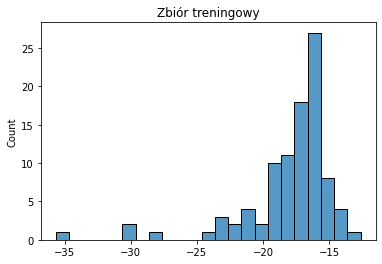

In [7]:
t_train = gmm.score_samples(train)
sns.histplot(t_train, binwidth = 1)
plt.title('Zbiór treningowy')

plt.show()

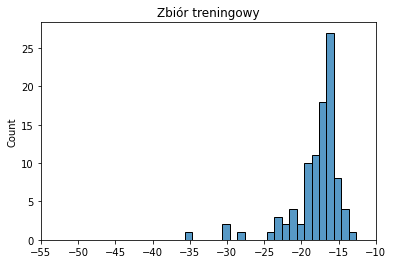

In [8]:
ax = sns.histplot(t_train, binwidth = 1)
ax.set(xlim = (-55, -10))
plt.title('Zbiór treningowy')

plt.show()

In [9]:
print(f"Wartość minimalna:  {np.min(t_train)}")
print(f"Wartość maksymalna: {np.max(t_train)}")
print(f"Wartość średnia:    {np.mean(t_train)}")

Wartość minimalna:  -35.632145622230794
Wartość maksymalna: -13.158134748744567
Wartość średnia:    -18.04442804949664


## Histogram dla zbioru walidacyjnrgo

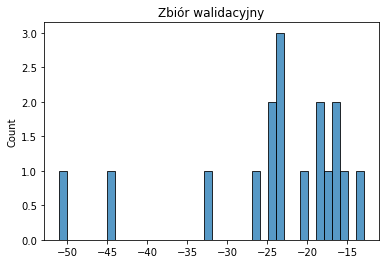

In [10]:
t_val = gmm.score_samples(val)

sns.histplot(t_val, binwidth = 1)
plt.title('Zbiór walidacyjny')

plt.show()

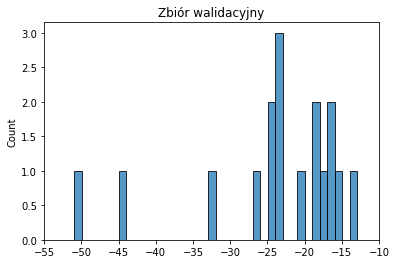

In [11]:
ax = sns.histplot(t_val, binwidth = 1)
ax.set(xlim = (-55, -10))
plt.title('Zbiór walidacyjny')

plt.show()

In [12]:
print(f"Wartość minimalna:  {np.min(t_val)}")
print(f"Wartość maksymalna: {np.max(t_val)}")
print(f"Wartość średnia:    {np.mean(t_val)}")

Wartość minimalna:  -50.96461189450416
Wartość maksymalna: -13.656306062919116
Wartość średnia:    -24.154141474064236


## Threshold

Na podstawie zbioru treningowego rozsądnym punktem odcięcia wydaje się $-25$, jednak w zbiorze walidacyjnym wartość średnia wynosi około $-24$ i wartości są bardziej przesunięte w lewą stronę.

Zatem na punkt odcięcia przyjmę wartość $-30$.

In [13]:
threshold = -30

In [14]:
print(f"Liczba outlierów w zbiorze treningowym:  {np.sum(t_train < threshold)}")
print(f"Liczba outlierów w zbiorze walidacyjnym: {np.sum(t_train < threshold)}")

Liczba outlierów w zbiorze treningowym:  3
Liczba outlierów w zbiorze walidacyjnym: 3


## Zbiór testowy

In [15]:
t_test = gmm.score_samples(test.iloc[:, 1:])

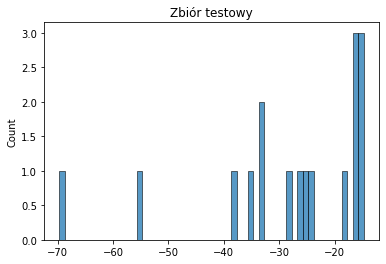

In [16]:
sns.histplot(t_test, binwidth = 1)
plt.title('Zbiór testowy')

plt.show()

In [17]:
results_test = (t_test < threshold).astype(int)

In [18]:
print(f"Liczba wykrytych outlierów:           {sum(results_test)}")
print(f"Liczba outlierów w zbiorze testowym:  {sum(test['class'])}")

Liczba wykrytych outlierów:           6
Liczba outlierów w zbiorze testowym:  5


Czyli mamy o jeden outlier za dużo

Sprawdźmy wartości metryk:

In [19]:
print(classification_report(test['class'], results_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.83      1.00      0.91         5

    accuracy                           0.94        17
   macro avg       0.92      0.96      0.93        17
weighted avg       0.95      0.94      0.94        17



Wyniki są bardzo dobre, a metryka recall osiągnęła nawet wartość $1$.

Podsumowując, wykorzystanie GMM do wykrywania próbek odstających ma sens.